In [6]:
import nltk #text processing / nlp functionality 
import os   #functions used: getfiles()
import re   #regular expression functions

#https://de.dariah.eu/tatom/preprocessing.html
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /home/docadmin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/docadmin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/docadmin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/docadmin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/docadmin/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/docadmin/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

### Inputs

In [7]:
#Data Directory
Dir_Articles = "//home//docadmin//ZackC//NLP_Amex//TestData//News articles//"

#Data Files 
files = getfiles(Dir_Articles,".txt")

#file to process 
filenum = 0

#text encoding 
encoding = "utf_8_sig"

#file delimiter
    # "\n"   #end of line
    # "\r\n\r\n" #blank line 
delim = "\n\n\n"  

### Import Text Data 

In [10]:
#Open file 
f =open(Dir_Articles+files[filenum],encoding = encoding) #py3
#f =open(Dir_Articles+files[filenum]) #py2

#Read file as string
a= f.read()

#Split lines into list based on new line indicator
b = a.split(delim)

#remove all completely white lines (helps postprocessing and identifying values that are below associated attribute)
c = [x for x in b if x]

'\xef\xbb\xbfThe taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don\xe2\x80\x99t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple\xe2\x80\x99s phones even thought it is forbidden by the company.\r\n\r\n\r\nUber has also tweaked its software so that regulatory agencies that the company regard

## Basic String Search and Locate with re module   
re.findall() & re.search() using Regex patterns


# Regex Patterns 
* OR is represented using |
* Define a group using ()
* Define explicit character ranges using []


##### pattern	matches	example
* **[A-Za-z]+	->** upper and lowercase English alphabet	-> 'ABCDEFghijk'
* **[0-9]	-> numbers from 0 to 9 ->**	9
* **[A-Za-z\-\.]+	->** upper and lowercase English alphabet, - and . ->	'My-Website.com'
* **(a-z)	->** a, - and z	-> 'a-z'
* **(\s+l,) ->** 	spaces or a comma ->	', '

##### Patterns to split string on 
* **r"\w+" :** splits strings into words 
* **r"\s+" :** splits words based on presence of one or more spaces
* **r"[A-Z]\w+" :** splits string based on presence of capitalized word in string 
* **r'#(?<=[.?!](\s|"))\s?(?=[A-Z\b"])#' :** split each string on the presence of punctuation followed by capital letter 
    
#### greedy reg-ex example
* my_str = 'match lowercase spaces nums like 12, but no commas'
* re.match('[a-z0-9 ]+', my_str) #this will match everythin up to the comma (greedy), once comma is found though reg-ex stops


In [22]:
#REGEX 

#re.findall():split each string on the presence of a reg-ex pattern
#Word pattern
Words = r"\w+"
Word_results = []
for i in range(len(c)):
    Word_results.append(re.findall(Words, c[i]))
    
#digit pattern 
Digits = r"\d+"
Digits_results = []
for i in range(len(c)):
    Digits_results.append(re.findall(Words, c[i]))
    
#re.split(): split each string on the presence of punctuation followed by capital letter 
#End of Sentence Pattern
Sentences = r'#(?<=[.?!](\s|"))\s?(?=[A-Z\b"])#'
Sentence_results = []
for i in range(len(c)):
    Sentence_results.append(re.split(Sentences, c[i]))

#Capitalized Words
Capitalized_Words = r"[A-Z]\w+"
CapitalWords_results = []
for i in range(len(c)):
    CapitalWords_results.append(re.split(Capitalized_Words, c[i]))

#spaces 
spaces = r"\s+"
Spaces_results = []
for i in range(len(c)):
    Spaces_results.append(re.split(Capitalized_Words, c[i]))

[['\xef\xbb\xbf',
  ' taxi-hailing company ',
  ' brings into very sharp focus the question of whether corporations can be said to have a moral character. ',
  ' any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. ',
  ' wanted to know as much as possible about the people who use its service, and those who don\xe2\x80\x99t. ',
  ' has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. ',
  ' if their email was notionally anonymised, this use of it was not something the users had bargained for. ',
  ' that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with ',
  '\xe2\x80\x99s phones even thought it is forbidden by the company.\r\n\r\n\r\n',
  ' has also tweaked its software so that regulatory agencies t

## Tokenization(Turning a string or document into tokens (smaller chunks))


### What tokenization helps with 
* 1 . Mapping parts of speech 
* 2 . Matching common words 
* 3 . Removing unwanted parts of speech 


### Tokenization Examples 
* 1 . Breaking out words or sentences
* 2 . Separating punctuation
* 3 . Separating all hashtags in a tweet

### Tokenizers we will use 
* 1 . Sent_tokenize: Tokenize a document into sentences
* 2 . regexp_tokenize: Tokenize a string or document based on a regular expression pattern 
* 3 . TweetTokenizer: Special class just for tweet tokenization, allowing you to separate hashtags, mentions and lots of exclamation points!!!

### re.search vs re.match 
* if you want to be specific about the composition of the entire string or at least the initial pattern use re.match(): match tries to match a string from the beginging until it cannot match any longer 
* when you need to find a pattern that may not be at the beginging of the string use re.search() : search will look through the entire string to look for match options 


In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import regexp_tokenize
#download all nltk resources using nltk downloader 
#nltk.download() #location: C:\Users\caridza\AppData\Roaming\nltk_data

#Note: Before this all text should be pre-processed, stemmed,etc....
#Create nested list containing document index, and all tokenized values pulled from that document

#Word Tokenization 
Word_Tokenize = []
for i in range(len(c)):
    words = word_tokenize(c[i])
    for j in range(len(words)):
        Word_Tokenize.append([str(i),words[j]])

#Sentence Tokenization 
Sentence_Tokenize = []
for i in range(len(c)):
    Sentences = sent_tokenize(c[i])
    for j in range(len(Sentences)):
        Sentence_Tokenize.append([str(i),Sentences[j]])

#Regex Tokenization(split on presence of Words starting with Capital letter)
Regex_Tokenize = []
for i in range(len(c)):
    spaces = regexp_tokenize(c[i],Capitalized_Words)
    for j in range(len(spaces)):
        Regex_Tokenize.append([str(i),spaces[j]])

#regex pattern + unicode to idnetify and parse based on presence of emojis
# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
emoji_out = regexp_tokenize(c[3], emoji))

#Get unique list of all tokens across documents
Word_Tokenize_Unique = []
for i in range(len(c)):
    Uniquewords = list(set(word_tokenize(c[i]))) 
    for j in range(len(Uniquewords)):
        Word_Tokenize_Unique.append([str(i),Uniquewords[j]])
        

#metadata around nested list 
type(Uniquewords)
len(Uniquewords)

#First word in the first corpus 
match = re.search(r"\w+", c[0])
match2 = re.match(r"\w+",c[0])
print(" Start of Match:",match.start(),"\n","End fo Match:",match.end())

## Charting word length with NLTK

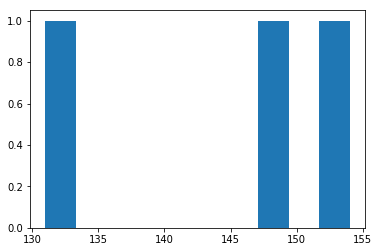

In [64]:
from matplotlib import pyplot as plt

#tokenize text and chart word length 
#use python list comprehension with our tokenized words array to transfrom it to list of lengths
#c is a list of corpuses we are splitting into words, we split all corpuses into words using regex tokenization
tokenized_lines = [regexp_tokenize(s,r"\w+") for s in c]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words)
plt.show()

## Bag of Words (to find topics in text)
## Determine significant words in a text based on the number of times they are used

#1. Tokenize words
#2. count up tokens and rank by frequency

In [23]:
#executing text pre-processing and identifying top 2 common terms from each corpus 
from collections import Counter
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import regexp_tokenize

#empty lists to store results at each step 
loweralpha = []
loweralpha_nostops = []
common = []
loweralpha_nostops_lemm = []
rawtokens = []

#loop through each line in text and process 
for i in range(len(c)):
    #string
    text = c[i]

    #chunk raw input into sentences and tokenize words for NER modeling 
    Sentences = [w for w in nltk.sent_tokenize(text)]
    tokens_raw = [nltk.word_tokenize(sent) for sent in Sentences]
    
    #pre-process text(to lower and remove punctuatin and numbers) 
    tokens = [w for w in word_tokenize(text.lower()) if w.isalpha()]

    #remove stopwords 
    no_stops = [t for t in tokens if t not in stopwords.words('english')]

    #Lemmatize all tokens into a new list: lemmatized
    wordnet_lemmatizer = WordNetLemmatizer()                           #Instantiate the WordNetLemmatizer
    lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

    #count total occurances of words in each corpus 
    wordcounts = Counter(lemmatized)

    #pull top 2 most common words out 
    commons = wordcounts.most_common(2)
    
    #lists of result stages
    rawtokens.append(tokens_raw)
    loweralpha.append([str(i),tokens])
    loweralpha_nostops.append([str(i),no_stops])
    loweralpha_nostops_lemm.append([str(i),lemmatized])
    common.append([str(i),commons])


UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 3: ordinal not in range(128)

In [65]:
tagged_sent = [nltk.pos_tag(rawtokens[1][0])]
tagged_sent = [nltk.pos_tag(doc) for doc in [el[0] for el in rawtokens]]

##tagged_sent
#rawtokens[1][0]
tagged_sent

[[('The', 'DT'),
  ('taxi-hailing', 'JJ'),
  ('company', 'NN'),
  ('Uber', 'NNP'),
  ('brings', 'VBZ'),
  ('into', 'IN'),
  ('very', 'RB'),
  ('sharp', 'JJ'),
  ('focus', 'VB'),
  ('the', 'DT'),
  ('question', 'NN'),
  ('of', 'IN'),
  ('whether', 'IN'),
  ('corporations', 'NNS'),
  ('can', 'MD'),
  ('be', 'VB'),
  ('said', 'VBD'),
  ('to', 'TO'),
  ('have', 'VB'),
  ('a', 'DT'),
  ('moral', 'JJ'),
  ('character', 'NN'),
  ('.', '.')],
 [('Uber', 'NNP'),
  ('has', 'VBZ'),
  ('also', 'RB'),
  ('tweaked', 'VBN'),
  ('its', 'PRP$'),
  ('software', 'NN'),
  ('so', 'IN'),
  ('that', 'DT'),
  ('regulatory', 'JJ'),
  ('agencies', 'NNS'),
  ('that', 'IN'),
  ('the', 'DT'),
  ('company', 'NN'),
  ('regarded', 'VBD'),
  ('as', 'IN'),
  ('hostile', 'NN'),
  ('would', 'MD'),
  (',', ','),
  ('when', 'WRB'),
  ('they', 'PRP'),
  ('tried', 'VBD'),
  ('to', 'TO'),
  ('hire', 'VB'),
  ('a', 'DT'),
  ('driver', 'NN'),
  (',', ','),
  ('be', 'VB'),
  ('given', 'VBN'),
  ('false', 'JJ'),
  ('reports', 'NN

  Could not find a version that satisfies the requirement Tkinter (from versions: )
No matching distribution found for Tkinter


## Using GENSIM to generate dictonaries and Corpus

######dictonary vs defaultdic 
#####Dictonary:convenient way to store data for later retrieval by name (key). Keys must be unique, immutable objects
#####DefaultDic: A defaultdict works exactly like a normal dict, but it is initialized with a function (“default factory”) that takes no arguments and provides the default value for a nonexistent key.A defaultdict will never raise a KeyError. Any key that does not exist gets the value returned by the default factory.

In [63]:
from gensim.corpora.dictionary import Dictionary
from collections import defaultdict
import itertools

#create mapping of ids for each token(create analysis on token ids)
#note: you can update dictonarys to account for new text, and to subset analysis on only a subset of words
#note: the second element in the lsit loweralpha_nostops_lemm contains the words, the first element is a mapping to the document number
dictonary = Dictionary([el[1] for el in loweralpha_nostops_lemm])

#mapping of tokens to terms
dictonary.token2id
#retrieve token associated with a term
unemployment_id = dictonary.token2id.get("unemployment")
#print(unemployment_id)

#create gensim corpus (a list of list, tuple(tokenid,token freq))
corpus = [dictonary.doc2bow(doc) for doc in [el[1] for el in loweralpha_nostops_lemm]]

#Create a defaultdict called total_word_count in which the keys are all the token ids (word_id) 
#and the values are the sum of their occurrence across all documents (word_count). 
#Remember to specify int when creating the defaultdict, and inside the for loop, increment each word_id of total_word_count by word_count.
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

#Create a sorted list from the defaultdict, using words across the entire corpus
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

# print the top five words of sorted_word_count as well as the number of occurrences of each word across all the documents.
for word_id, word_count in sorted_word_count[:15]:
    print(dictonary.get(word_id), word_count)
    
    


company 9
uber 8
use 4
much 4
service 3
would 3
even 3
driver 3
rival 2
behave 2
apple 2
phone 2
people 2
user 2
promised 2


## TF-IDF (Term Frequency inverse document frequency)
### Purpose: Ensures most common words don't show up as key words
##### Allows you to determine the most important words in each document
##### Each corpus may have shared words beyond just stopwords
##### These words should be down-weighted in importance
##### Example from astronomy: "Sky"

####TD-IDF with ML : http://aimotion.blogspot.com/2011/12/machine-learning-with-python-meeting-tf.html

####NOTE: the token weights can be utilized to determine good topics and key words for a corpus with shared vocabulary

In [20]:
from gensim.models.tfidfmodel import TfidfModel
#create tdif matrix 
tfidf = TfidfModel(corpus)

#tfidf weights from first 40 corpus's 
tfidf_weights = tfidf[corpus[:40]]

# Sort the weights from highest to lowest: sorted_tfidf_weights
#key = or each element (x) in mylist, return index 1 of that element,
#      then sort all of the elements of the original list 'mylist' by 
#      the sorted order of the list calculated by the lambda function. Since we
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
for term_id, weight in itertools.chain.from_iterable(sorted_tfidf_weights):
    print(dictonary.get(term_id), weight)


behave 0.04338637527703871
people 0.04338637527703871
user 0.04338637527703871
law 0.04338637527703871
ride 0.04338637527703871
driver 0.08677275055407742
hostile 0.04338637527703871
break 0.117555873703948
mayer 0.117555873703948
task 0.117555873703948
insecure 0.235111747407896
cheapness 0.117555873703948
billionaire 0.117555873703948
cause 0.235111747407896
sharing 0.117555873703948
failure 0.117555873703948
valley 0.117555873703948
clique 0.117555873703948
care 0.117555873703948
convenience 0.117555873703948
yet 0.117555873703948
million 0.117555873703948
many 0.117555873703948
fairly 0.117555873703948
payout 0.117555873703948
yahoo 0.117555873703948
others 0.117555873703948
humane 0.117555873703948
value 0.235111747407896
economy 0.117555873703948
culture 0.117555873703948
tax 0.117555873703948
get 0.117555873703948
euphoria 0.117555873703948
widely 0.117555873703948
outgoing 0.117555873703948
panic 0.117555873703948
encourages 0.117555873703948
tame 0.117555873703948
around 0.117

## NER Models
##### NLP task to identify important named entities in the text 
##### People, places, organizations ,Dates, states, works of art Can be used alongside topic identification or on its own!
#### Helps awnser: Who? What? When? Where?
#### nltk enables ner with its own model and the Stanford CoreNLPP library 
#### stanford nlp library also supports: linking pro-nouns and entities together, coreference and dependency trees to help parse meaning from reltionships across words / phrases in a sentence

(NE Uber/NNP)


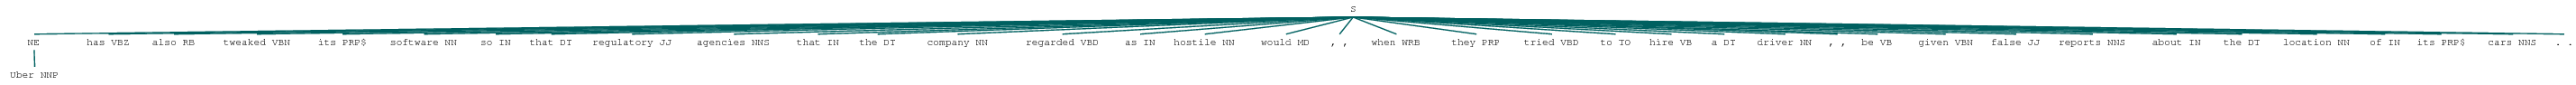

In [43]:
import os 
from nltk import word_tokenize, pos_tag, ne_chunk 

#path to gs (required to output image of tree sentence)
#https://stackoverflow.com/questions/39007755/cant-find-ghostscript-in-nltk
#gspath = "C://Program Files//gs//gs9.21//bin"
#os.environ['PATH'] += os.pathsep + gspath

#create pos tag for all tokenized words in each document 
#Q: do we want to pre-process text for this, or is it best to leave in raw form to retain captilization / punctuation / etc...
tagged_sent = [nltk.pos_tag(doc) for doc in [el[0] for el in rawtokens]]

# Create the named entity chunks: chunked_sentences
NEChunk = nltk.ne_chunk_sents(tagged_sent, binary = True)
NEChunkView = nltk.ne_chunk(tagged_sent[1], binary = True)

#Loop over each sentence and each chunk, and test whether it is a named-entity chunk
#by testing if it has the attribute label, and if the chunk.label() is equal to "NE". 
#If so, print that chunk.
for sent in NEChunk:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

#all tags associated with each chunk for each sentence processed 
#for sent in NEChunk: 
#    for chunk in sent:
#        print(chunk)

#Visualize Sentence Tree for selected text 
NEChunkView

In [62]:
tagged_sent = [nltk.pos_tag(doc) for doc in [el[1] for el in rawtokens]]
tagged_sent
NEChunk = nltk.ne_chunk_sents(tagged_sent, binary = False)
NEChunk

<generator object ParserI.parse_sents.<locals>.<genexpr> at 0x7f760dc59a40>

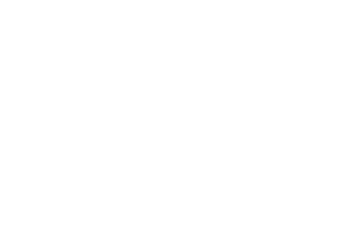

defaultdict(int, {})

In [60]:
import os 
from nltk import word_tokenize, pos_tag, ne_chunk 
from matplotlib import pyplot as plt

#path to gs (required to output image of tree sentence)
#https://stackoverflow.com/questions/39007755/cant-find-ghostscript-in-nltk
#gspath = "C://Program Files//gs//gs9.21//bin"
#os.environ['PATH'] += os.pathsep + gspath

#create pos tag for all tokenized words in each document 
#Q: do we want to pre-process text for this, or is it best to leave in raw form to retain captilization / punctuation / etc...
tagged_sent = [nltk.pos_tag(doc) for doc in [el[1] for el in rawtokens]]

# Create the named entity chunks: chunked_sentences
NEChunk = nltk.ne_chunk_sents(tagged_sent, binary = False)
NEChunkView = nltk.ne_chunk(tagged_sent[0], binary = False)

# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in NEChunk:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

#show sentence tree for one of the documents
NEChunkView

## SPACY & DISPLACY

In [49]:
!pip install matplotlib

    100% |████████████████████████████████| 15.0MB 105kB/s eta 0:00:01
  Using cached pyparsing-2.2.0-py2.py3-none-any.whl


In [46]:
import spacy

#Load english model
nlp = spacy.load('en')

#create a spacy document by passing the article into nlp engine
doc = nlp(a)
#corpa info 
len(doc)
type(doc)


#iterate over the entities of the document and print the labels 
for ent in doc.ents: 
    print(ent.label_,ent.text)



ImportError: No module named 'spacy'

In [2]:
#FUNCTIONS
#get files
def getfiles(path, extension):
    items = os.listdir(path)
    newlist = []
    for names in items:
        if names.endswith(extension):
            newlist.append(names)
    return newlist
